The goal of this step is to normalize and standardize all the features in your data, as well as create a validation set

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from scipy.stats import skew

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score,  train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA



Preprocessing 


In [2]:
pd.set_option('display.max_rows', 300)

In [3]:
test = pd.read_csv('data /test_3.csv',index_col=0)

In [4]:
test.head()

,Unnamed: 0.1,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
test = test.drop(['Unnamed: 0.1'],axis=1)

In [6]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
train = pd.read_csv('data /train_3.csv',index_col=0)

In [8]:
train

,Unnamed: 0.1,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.072547
1456,1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,12.254868
1457,1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.864469


In [9]:
train.drop(['Unnamed: 0.1'],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.072547
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,12.254868
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.864469


Handling the numerical and categorical features 

In [10]:
numerical_features = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))

categorical_features = train.dtypes[train.dtypes == "object"].index
print("Number of categorical features:", len(categorical_features))



Number of Numerical features:  39
Number of categorical features: 43


Dealing with missing values 

In [11]:
# Check the percentage of missing values for each columns for train 

total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['total', 'Missing_Ratio'])
missing_data.head(20)


,total,Missing_Ratio
PoolQC,1451,99.7
MiscFeature,1402,96.3
Alley,1365,93.8
Fence,1176,80.8
FireplaceQu,690,47.4
LotFrontage,259,17.8
GarageType,81,5.6
GarageYrBlt,81,5.6
GarageQual,81,5.6
GarageCond,81,5.6


In [12]:
# Check the percentage of missing values for each columns for test 

total = test.isnull().sum().sort_values(ascending=False)
percent_1 = test.isnull().sum()/test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['total', 'Missing_Ratio'])
missing_data.head(20)

,total,Missing_Ratio
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageYrBlt,78,5.3
GarageQual,78,5.3
GarageFinish,78,5.3
GarageCond,78,5.3


In [13]:
#taking care of lot frontage in test&train sets with mean value 

train['LotFrontage'] = train['LotFrontage'].fillna(train.LotFrontage.mean())

test['LotFrontage'] = test['LotFrontage'].fillna(test.LotFrontage.mean())

In [14]:
#using loop to fill in these categorical features with 'none'

list1 =["Alley",
                       "PoolQC",
                      "MiscFeature",
                       "Fence",
                       "GarageCond",
                       "GarageQual",
                       "GarageFinish",
                       "GarageType",
                       "FireplaceQu",
                       "BsmtExposure",
                       "BsmtCond",
                       "BsmtQual",
                       "BsmtFinType1",
                       "BsmtFinType2",
                       "MasVnrType"]
                       
for i in list1:
    
    train[i] = train[i].fillna("None")
    test[i] = test[i].fillna("None")


In [15]:
#using loop to fill in these features with '0'
list2 = ["MasVnrArea",
                          "BsmtFinSF1",
                          "BsmtFinSF2",
                           "BsmtUnfSF",
                          "TotalBsmtSF",
                          "BsmtFullBath",
                          "BsmtHalfBath",
                          "GarageYrBlt",
                          "GarageCars",
                          "GarageArea"]

for i in list2:
    train[i] = train[i].fillna(0)
    test[i] = test[i].fillna(0)

In [16]:
#Utilities, electric,functional 
train ["Utilities"]= train ["Utilities"].fillna("AllPub")
train ["Electrical"] = train ["Electrical"] .fillna("SBrkr")
train ["Functional"] = train ["Functional"] .fillna("Typ")

In [17]:
test ["Utilities"]=test ["Utilities"].fillna("AllPub")
test["Electrical"] = test["Electrical"] .fillna("SBrkr")
test ["Functional"] =test ["Functional"] .fillna("Typ")

In [18]:
#Filling Exterior1st, Exterior2nd, KitchenQual, SaleType, MSZoning with mode 
train ["Exterior1st"]= train["Exterior1st"].fillna(train["Exterior1st"].mode()[0])
train ["Exterior2nd"]= train["Exterior2nd"].fillna(train["Exterior2nd"].mode()[0])
train["KitchenQual"] = train["KitchenQual"] .fillna(train["KitchenQual"].mode()[0])
train["SaleType"]  =   train["SaleType"] .fillna(train["SaleType"].mode()[0])

In [19]:
test ["Exterior1st"]= test["Exterior1st"].fillna(test["Exterior1st"].mode()[0])
test ["Exterior2nd"]= test["Exterior2nd"].fillna(test["Exterior2nd"].mode()[0])
test["KitchenQual"] = test["KitchenQual"] .fillna(test["KitchenQual"].mode()[0])
test["SaleType"]  =   test["SaleType"] .fillna(test["SaleType"].mode()[0])
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])

Since some of the categorical features were stored as numbers, we wll now convert them to strings. 


In [20]:
#MSSubClass=The building class
train['MSSubClass'] = train['MSSubClass'].apply(str)
test['MSSubClass'] = test['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)
test['OverallCond'] = test['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

In [21]:
train.shape, test.shape

((1456, 82), (1459, 80))

now time to check if anythings missing..fingers crossed ! 

In [22]:
train.isnull().any().any()

False

In [23]:
test.isnull().any().any()

False

# Reducing multicolinearity and adding features

From the Eda, we saw that there were some features that were highly correlated. That will become an issue later on because mulitcolinearity(where 2 or more features have a high correlation which in essence throws off the prediction model) will present itselfunless we take away some features at this point.  

GarageArea,TotRmsABVGr,1stFlrSF are the features that we will take away for right now. 

In [24]:
correlated_features = set()
correlation_matrix = train.corr()
            

In [25]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [26]:
len(correlated_features)


5

In [27]:
print(correlated_features)

{'1stFlrSF', 'GarageArea', 'SalePrice', 'TotRmsAbvGrd', 'Id'}


In [28]:
train.drop(labels=['GarageArea','TotRmsAbvGrd','1stFlrSF',],axis=1,inplace=True)
test.drop(labels=['GarageArea','TotRmsAbvGrd','1stFlrSF',],axis=1,inplace=True)

In [29]:
print(correlated_features)

{'1stFlrSF', 'GarageArea', 'SalePrice', 'TotRmsAbvGrd', 'Id'}


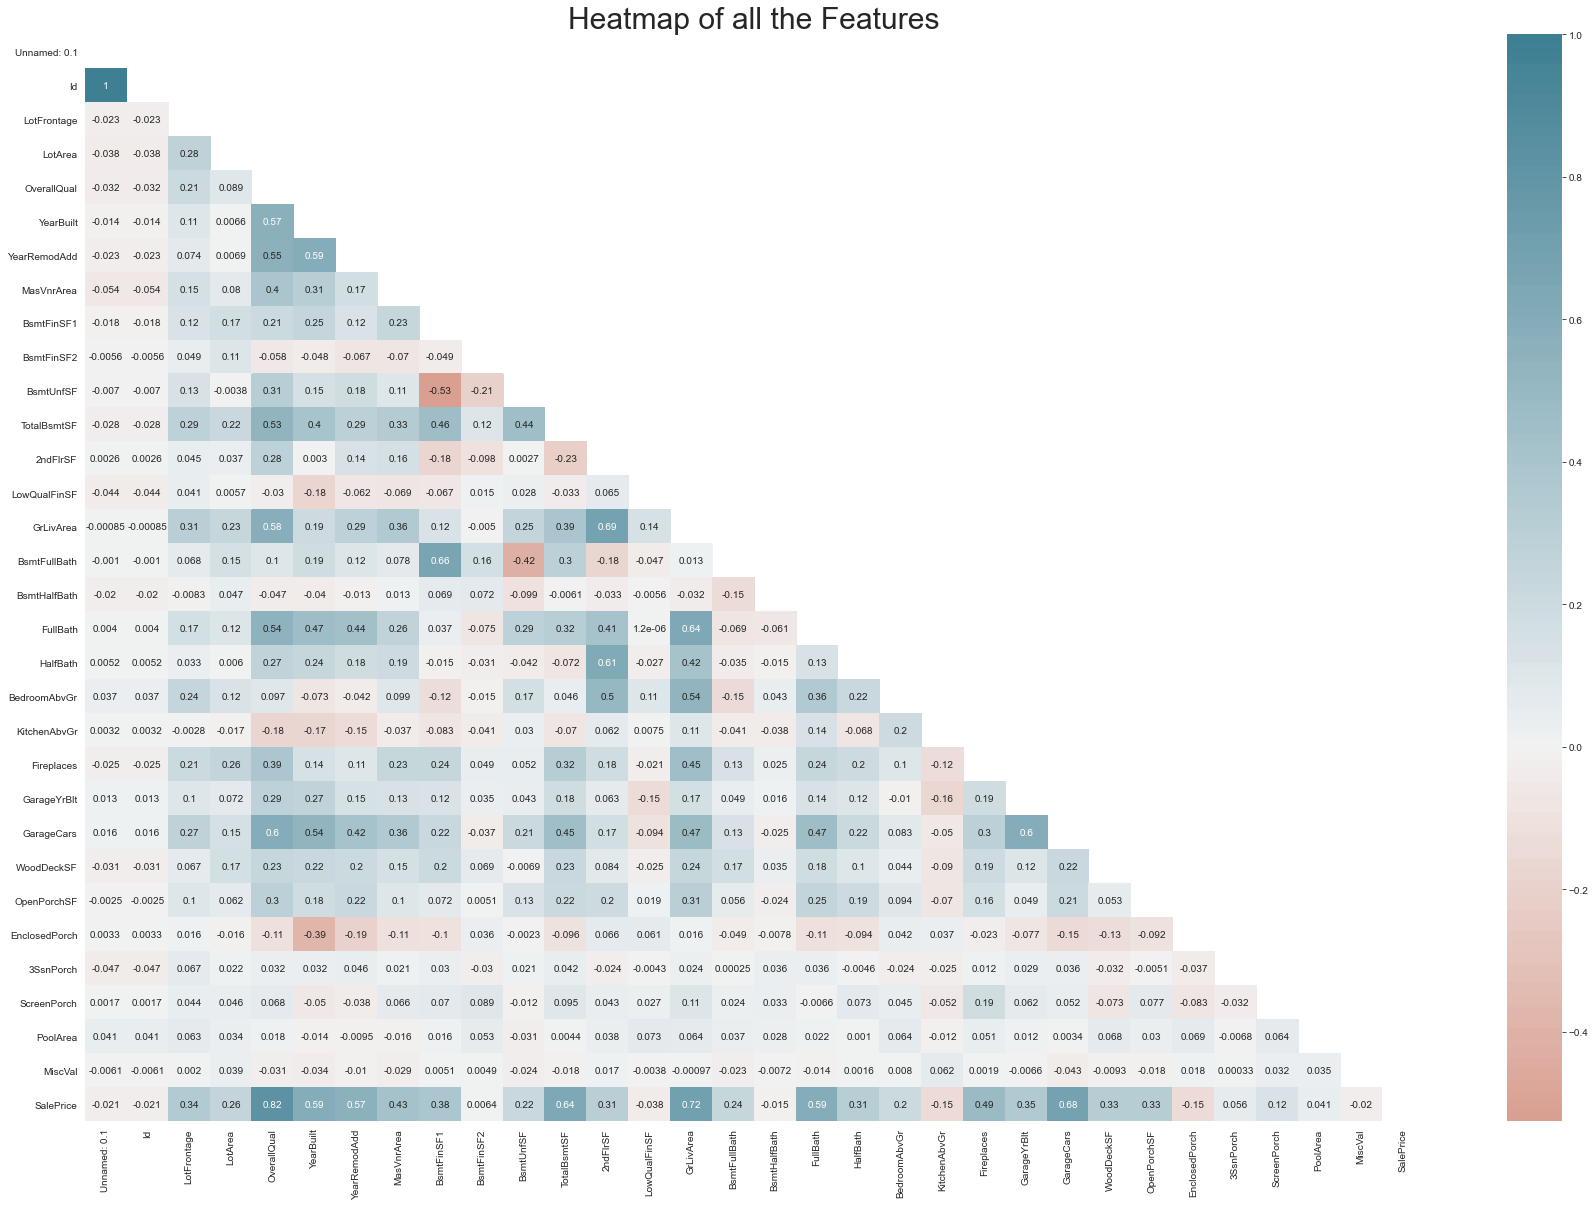

In [30]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);
plt.savefig("Heatmap.png")

It's odd that they didn't add a total sqaure foot feature considering how much GrLivArea' and 'TotalBsmtSF is correlated with the sales price. It's time we add this feature. 

In [31]:
# Adding total sqfootage feature 
train['TotalSF'] = train['TotalBsmtSF'] + train['GrLivArea'] 
test['TotalSF'] = test['TotalBsmtSF'] + test['GrLivArea'] 

time to take care of the skewness affecting our data 

In [32]:
numeric_f = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features

skewed_f = train[numeric_f].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew in train data' :skewed_f})
skewness.head(10)

,Skew in train data
MiscVal,24.418175
PoolArea,17.504556
LotArea,12.574590
3SsnPorch,10.279262
LowQualFinSF,8.989291
KitchenAbvGr,4.476748
BsmtFinSF2,4.244209
BsmtHalfBath,4.124712
ScreenPorch,4.111400
EnclosedPorch,3.081275


In [33]:
# normalizing skew for train

numeric_features = train.dtypes[train.dtypes != object].index
skewed_features = train[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Normalize skewed features using log_transformation
    
for i in skew_index:
    train[i] = np.log1p(train[i])

In [34]:
#for test

numeric_features = test.dtypes[test.dtypes != object].index
skewed_features = test[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Normalize skewed features using log_transformation
    
for i in skew_index:
    test[i] = np.log1p(test[i])

Last but not least, we will use get_dummies on the test and train data to encode categorical features. 

In [35]:
train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

#Balancing Data Sets
missing_cols = set(train.columns) - set(test.columns)
for c in missing_cols:
    test[c] = 0  

missing_cols = set(test.columns) - set(train.columns)
for c in missing_cols:
    train[c] = 0
    
test = test[train.columns.tolist()]

#Checking Shapes
train.shape,test.shape

((1456, 293), (1459, 293))

In [36]:
train

,Unnamed: 0.1,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_150
0,0,1,4.189655,9.042040,7,2003,2003,5.283204,6.561031,0.000000,...,0,0,0,1,0,0,0,1,0,0
1,1,2,4.394449,9.169623,6,1976,1976,0.000000,6.886532,0.000000,...,0,0,0,1,0,0,0,1,0,0
2,2,3,4.234107,9.328212,7,2001,2002,5.093750,6.188264,0.000000,...,0,0,0,1,0,0,0,1,0,0
3,3,4,4.110874,9.164401,7,1915,1970,0.000000,5.379897,0.000000,...,0,0,0,1,0,0,0,0,0,0
4,4,5,4.442651,9.565284,8,2000,2000,5.860786,6.486161,0.000000,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,4.143135,8.976894,6,1999,2000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,1,0,0
1456,1456,1457,4.454347,9.486152,6,1978,1988,4.787492,6.673298,5.099866,...,0,0,0,1,0,0,0,1,0,0
1457,1457,1458,4.204693,9.109746,7,1941,2006,0.000000,5.620401,0.000000,...,0,0,0,1,0,0,0,1,0,0
1458,1458,1459,4.234107,9.181735,5,1950,1996,0.000000,3.912023,6.937314,...,0,0,0,1,0,0,0,1,0,0


In [37]:
test.to_csv('data /test_4.csv')

In [38]:
train.to_csv('data /train_4.csv')